# 4. Explore the Data

> "I don't know, what I don't know"

- Why do **visual exploration**?
- Understand Data Structure & Types
- Explore **single variable graphs** - Quantitative, Categorical
- Explore **dual variable graphs** - (Q & Q, Q & C, C & C)
- Explore **multi variable graphs**

In [1]:
# Import the two library we need, which is Pandas and Numpy
import pandas as pd
import numpy as np

In [2]:
# Read the csv file of Monthwise Quantity and Price
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

## Understand Data Structure and Types

In [3]:
df.shape

(10227, 10)

In [4]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [5]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [6]:
df.date = pd.DatetimeIndex(df.date)

In [7]:
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [8]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


## Visual Exploration 
Lets load the libraries required for Visual Exploration

In [9]:
# Load the visualisation libraries - Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

## Question 1 - Which state had the highest quantity of sales in 2010?

In [11]:
df2010 = df[df.year == 2010]

In [12]:
df2010.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
10,ABOHAR(PB),February,2010,555,1143,1460,1322,PB,ABOHAR,2010-02-01
18,ABOHAR(PB),March,2010,385,510,878,688,PB,ABOHAR,2010-03-01
25,ABOHAR(PB),April,2010,840,466,755,611,PB,ABOHAR,2010-04-01
32,ABOHAR(PB),May,2010,2050,391,578,494,PB,ABOHAR,2010-05-01


###  Principle: Split Apply Combine

How do we get the sum of quantity for each state. We need to SPLIT the data by each state, APPLY the sum to the quantity row and then COMBINE the data again

![](../img/splitapplycombine.png)

In [13]:
df2010States = df2010.groupby(['state']).sum()

In [14]:
df2010States.head()

,year,quantity,priceMin,priceMax,priceMod
state,,,,,
AP,48240,976090,17535,29501,24423
ASM,24120,390480,18501,21626,20438
BH,24120,274420,14528,16042,15300
DEL,24120,3508582,7028,17548,13576
GUJ,134670,6657575,41550,87579,68500


In [15]:
df2010States = df2010.groupby(['state'])['quantity'].sum()

In [16]:
df2010States.head()

state
AP      976090
ASM     390480
BH      274420
DEL    3508582
GUJ    6657575
Name: quantity, dtype: int64

In [17]:
# To create a dataframe again
df2010States = df2010.groupby(['state'], as_index=False)['quantity'].sum()

In [18]:
df2010States.head()

,state,quantity
0,AP,976090
1,ASM,390480
2,BH,274420
3,DEL,3508582
4,GUJ,6657575


In [19]:
# Sort the Dataframe by Quantity
df2010States = df2010States.sort_values(by = "quantity", ascending=False)
df2010States.tail()

,state,quantity
2,BH,274420
7,JK,251785
5,HR,219225
6,JH,115600
8,KEL,250


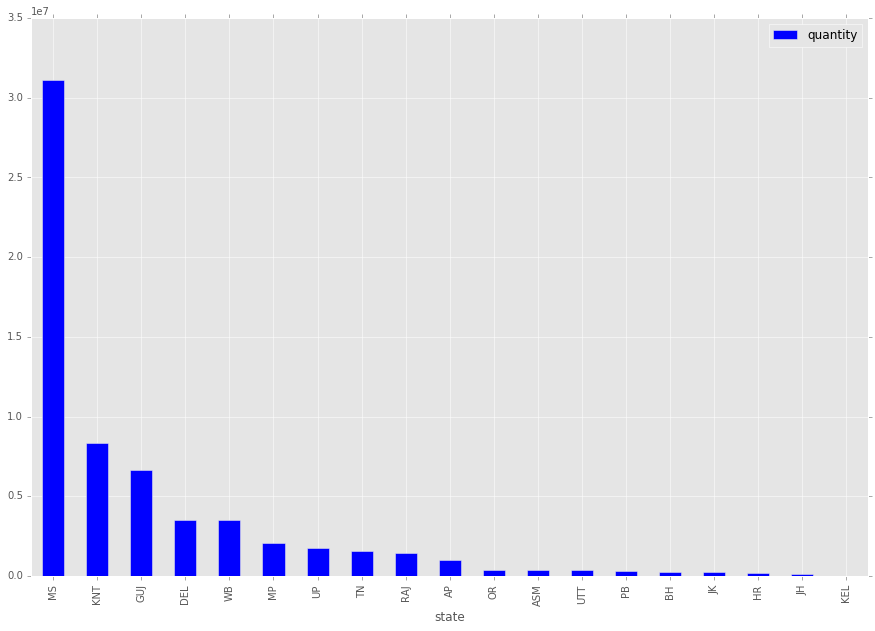

In [20]:
# Plot the Data
df2010States.plot(kind ="bar", x = 'state', y = 'quantity')

### Exercise: Find the City with Highest Quantity Sales in 2015?

## Question 2 - What is the yearly price variation in Bangalore? 

In [21]:
# Set the Index for the Dataframe
df.index = pd.PeriodIndex(df.date, freq='M')

In [22]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [23]:
dfBang = df[df.city == 'BANGALORE']

In [24]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2005-01,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
2006-01,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
2007-01,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
2008-01,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [25]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,2009.589041,523917.424658,557.541096,1313.883562,1043.547945
std,3.522678,302369.030403,381.415623,911.101944,667.509329
min,2004.000000,63824.000000,145.000000,338.000000,320.000000
25%,2007.000000,329690.000000,307.000000,685.000000,551.000000
50%,2010.000000,403530.500000,448.000000,1019.000000,836.000000
75%,2013.000000,661252.000000,653.000000,1636.000000,1325.500000
max,2016.000000,1639032.000000,2377.000000,4698.000000,3430.000000


In [26]:
pd.set_option('precision', 0)

In [27]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,523917,558,1314,1044
std,4,302369,381,911,668
min,2004,63824,145,338,320
25%,2007,329690,307,685,551
50%,2010,403530,448,1019,836
75%,2013,661252,653,1636,1326
max,2016,1639032,2377,4698,3430


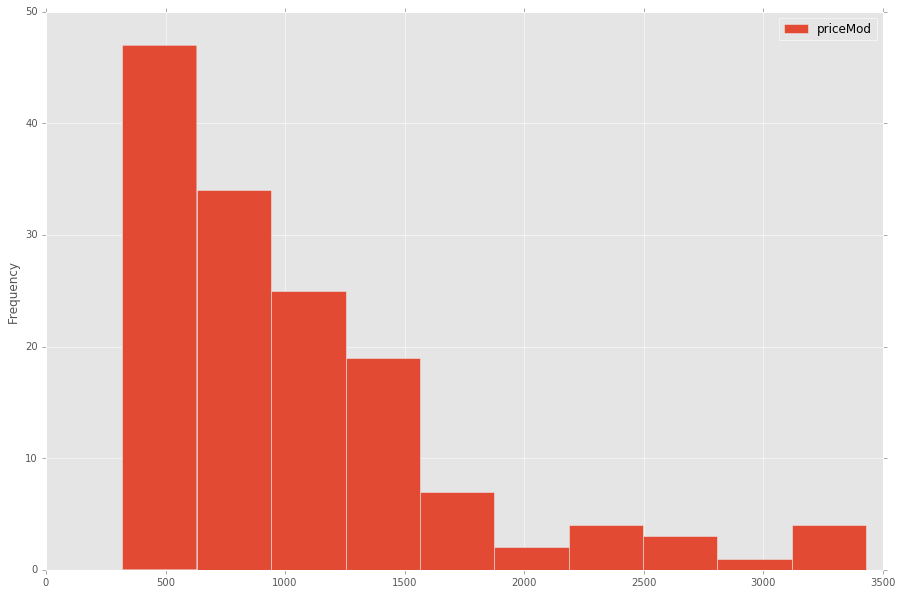

In [28]:
dfBang.plot(kind = 'hist', y = 'priceMod')

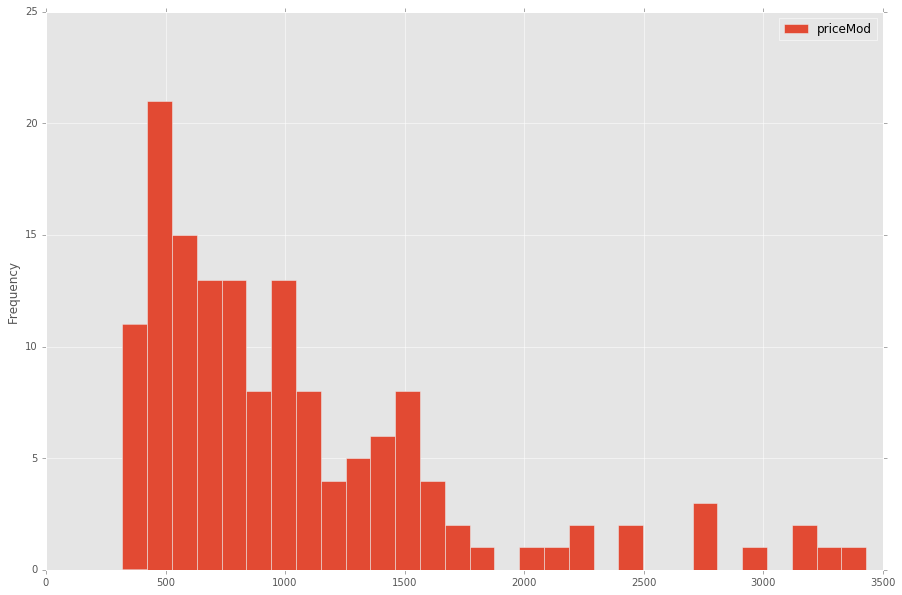

In [29]:
dfBang.plot(kind = 'hist', y = 'priceMod', bins = 30)

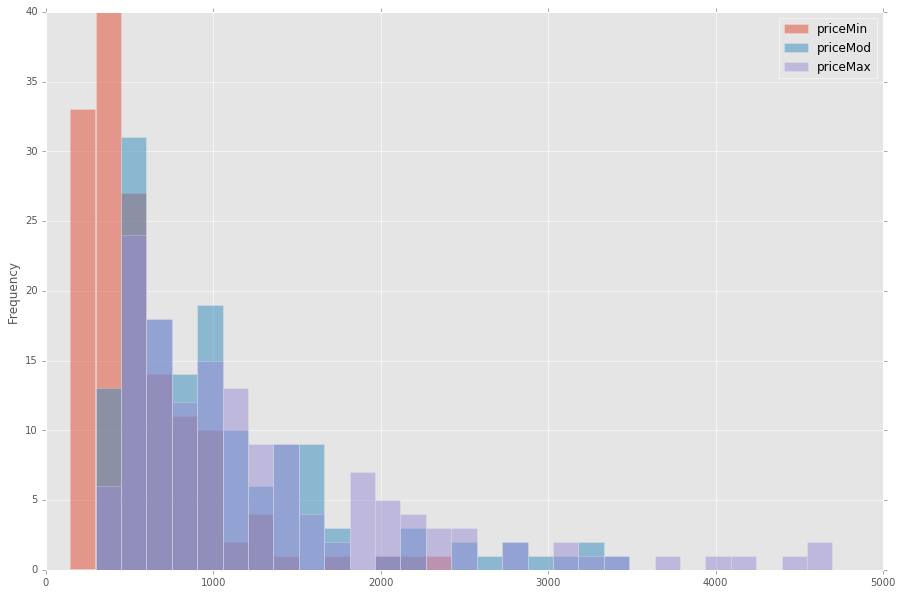

In [30]:
dfBang.plot(kind = 'hist', y = ['priceMin','priceMod', 'priceMax'], bins = 30, alpha = 0.5)

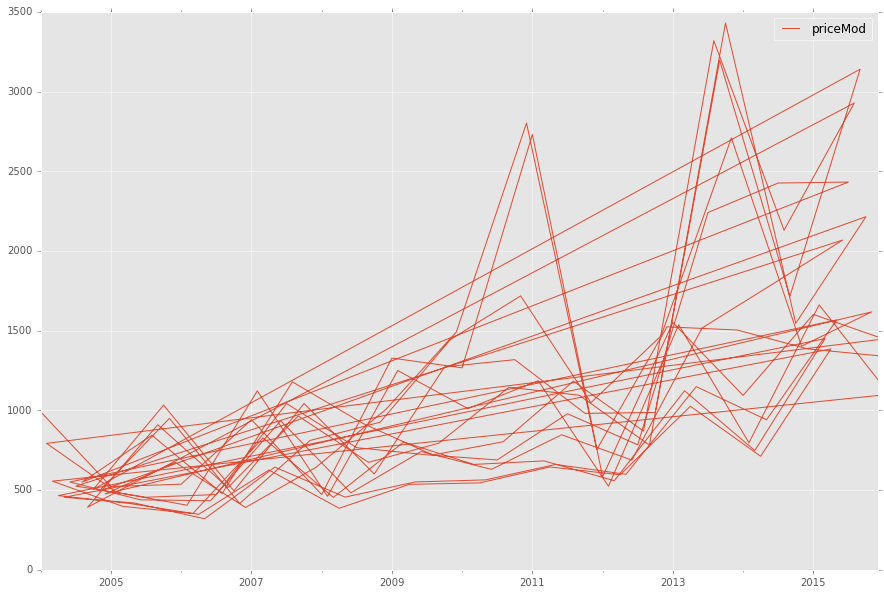

In [31]:
dfBang.plot(kind = "line", y = 'priceMod')

In [32]:
dfBang = dfBang.sort_index()

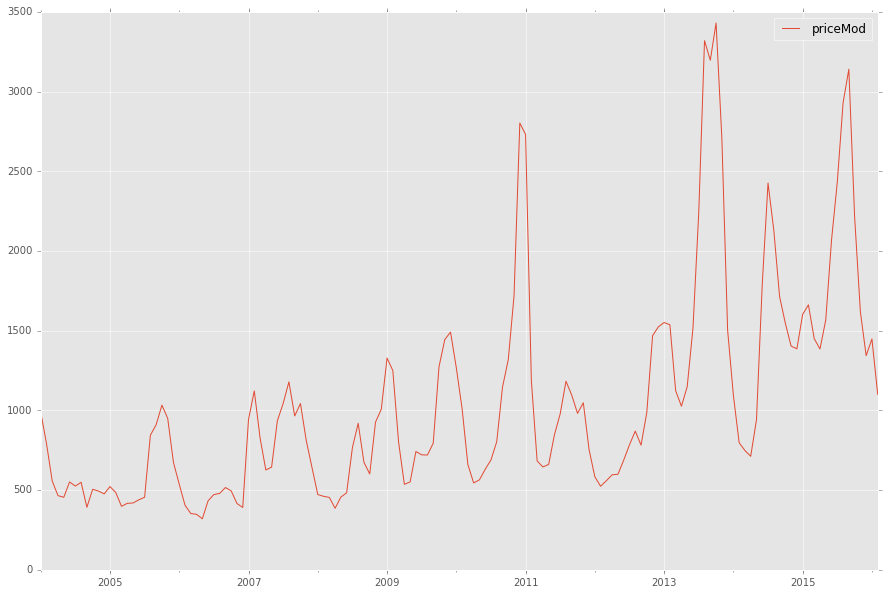

In [33]:
dfBang.plot(kind = "line", y = 'priceMod')

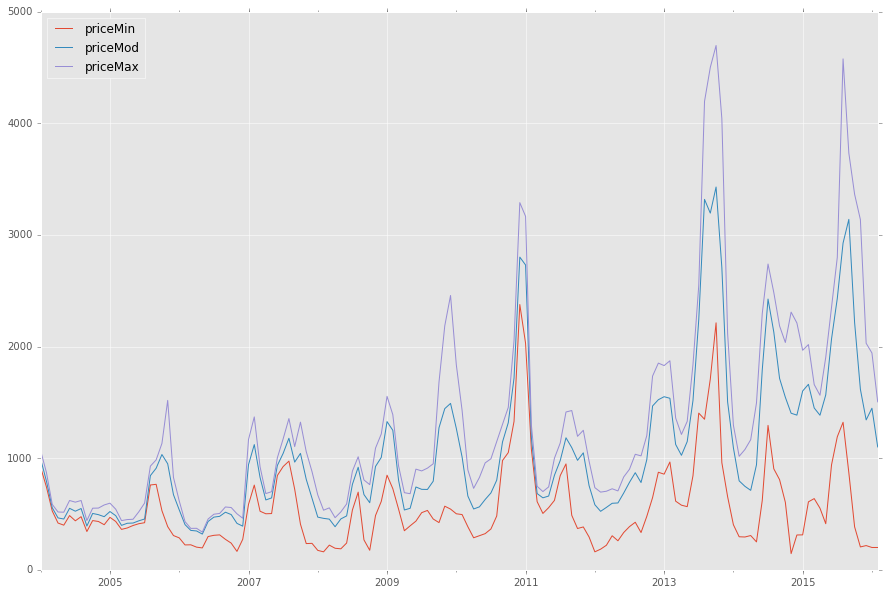

In [34]:
dfBang.plot( kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

In [35]:
dfBangPivot = pd.pivot_table(dfBang, values = "priceMod", index = "year", columns = "month")

In [36]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [37]:
dfBangPivot.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2004,465,549,476,793,991,525,551,556,455,494,505,392
2005,417,844,673,485,522,455,439,398,419,950,1033,910
2006,348,479,391,405,537,472,433,353,320,416,495,516
2007,626,1179,642,1122,942,1043,935,828,644,811,1043,965
2008,386,919,1007,461,472,766,483,454,456,926,601,674


In [38]:
dfBang['monthVal'] = pd.DatetimeIndex(dfBang['date']).month

In [40]:
dfBangPivot = pd.pivot_table(dfBang, values = "priceMod", columns = "year", index = "monthVal")

In [42]:
dfBangPivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
monthVal,,,,,,,,,,,,,
1,991,522,537,942,472,1328,1267,2731,583,1551,1094,1602,1448
2,793,485,405,1122,461,1250,1011,1186,524,1537,797,1662,1101
3,556,398,353,828,454,801,661,683,559,1123,748,1450,NaN
4,465,417,348,626,386,536,545,645,596,1026,712,1385,NaN
5,455,419,320,644,456,551,564,661,599,1149,941,1567,NaN
6,551,439,433,935,483,742,630,847,688,1517,1791,2068,NaN
7,525,455,472,1043,766,721,689,979,784,2241,2426,2432,NaN
8,549,844,479,1179,919,720,803,1183,870,3319,2130,2928,NaN
9,392,910,516,965,674,794,1145,1095,782,3196,1715,3140,NaN


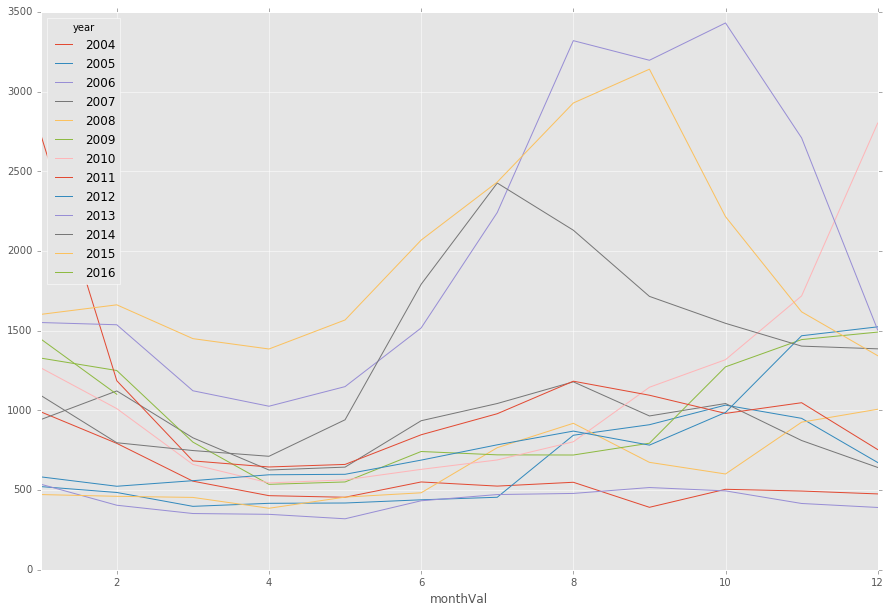

In [43]:
dfBangPivot.plot()